# With one Threshold

In [1]:
import os
import sys
import numpy as np
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import *

In [73]:
kml_file_name = input('Enter kml name: ')
#print(file_path)
#C:\Users\Harith\EngenuityAI\SPE\SPE-development\sentinal\gAMPOLA TEST SITE 2.kml

file_path = os.path.join(os.getcwd(), 'test_kml_files', kml_file_name )
print("The KML file path:",file_path, end="")
if os.path.exists(file_path):
    print(' Exists')
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()
else:
    print(' The specified file does NOT exist')

# getting polygon coordinates
poly_coord = kml_coord(file_path)

Enter kml name: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\test_kml_files\BeiraLakeColombo.kml
The KML file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\test_kml_files\BeiraLakeColombo.kml Exists


In [74]:
kml_file_name_no_ext = kml_file_name.split(".")[0]
dat_file_name = kml_file_name_no_ext + '.npy'
file_path_to_sat_img = os.path.join( os.getcwd(), 'kml_to_ndarray', dat_file_name )

img = None
print(file_path_to_sat_img)
if os.path.exists(file_path_to_sat_img):
    print('Sat ndarray image exist already')
    # img = np.fromfile(file_path_to_sat_img, dtype=float)
    img = np.load(file_path_to_sat_img)
    resol = 10

else:
    print("NeW KML file uploaded; ping to API")        
    img,resol = senti_api(poly_coord)
    # img.tofile(file_path_to_sat_img)
    np.save(file_path_to_sat_img, img)

C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\test_kml_files\BeiraLakeColombo.npy
NeW KML file uploaded; ping to API
Cloud Pixel:  0.0  km2


In [99]:
forest_area,forest_cover,green_pixel,green_cov,ndvi, ndvi_d, cloud_cover = get_cover(img,resol,
                                                                                     0.31, 
                                                                                     0.77)

Land area:  2.4212 km2
Forest/ Green area:  0.4457 km2


In [100]:
# Forest cover plot
def green_cover_plot(ndvi,
                     ndvi_data,
                     green_cover,
                     cloud_cover):
    
    '''
    ndvi: ndvi index values

    '''
    
    # Create classes and apply to NDVI results
    #ndvi_class_bins = [-np.inf, l_thresh, up_thresh, np.inf]
    #ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

    # Apply the nodata mask to the newly classified NDVI data
    ndvi_landsat_class = np.ma.masked_where(np.ma.getmask(ndvi), 
                                            ndvi_data)
    
    if green_cover == 0.00:
    
        # Define color map
        nbr_colors = ["gray"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = ["No Vegetation"]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        ep.draw_legend(im_ax=im, titles=ndvi_cat_names)

        
    elif (green_cover > 0.00 and green_cover < 100.00):
            
        # Define color map
        nbr_colors = ["gray", "green"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = [
            "No Vegetation",
            "Vegetation"]


        # Get list of classes
        classes = np.unique(ndvi_landsat_class)
        classes = classes.tolist()

        # The mask returns a value of none in the classes. remove that
        classes = classes[0:2]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
        
    else:
            
        # Define color map
        nbr_colors = ["green"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = [
            "Vegetation"]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        ep.draw_legend(im_ax=im, titles=ndvi_cat_names)

        

    # text box
    textstr = '\n'.join((
        r'Forest cover: %.2f %%' % (green_cover, ),
        r'Cloud cover: %.2f %%' % (cloud_cover, )))
        #r'Total Sequestared Carbon amount: %.2f kg' % (seq_current, ),
        #r'No of trees: %.0f' % (t_count, )))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.50, 0.00, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    ax.set_title(
    "Greenery Details of Your Land ",
    fontsize=14)
    ax.set_axis_off()
    plt.savefig('output/gren_cover.png',bbox_inches='tight')

    return plt

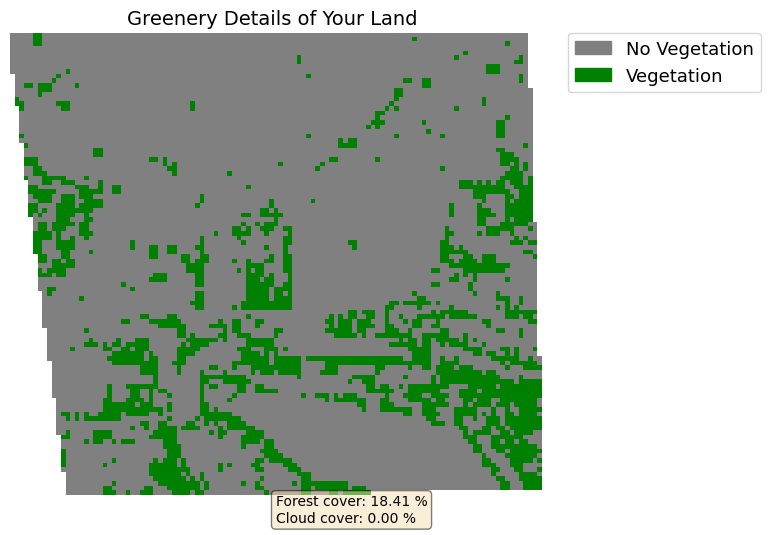

In [101]:
fig = green_cover_plot(ndvi,ndvi_d,forest_cover, cloud_cover)
fig.show()

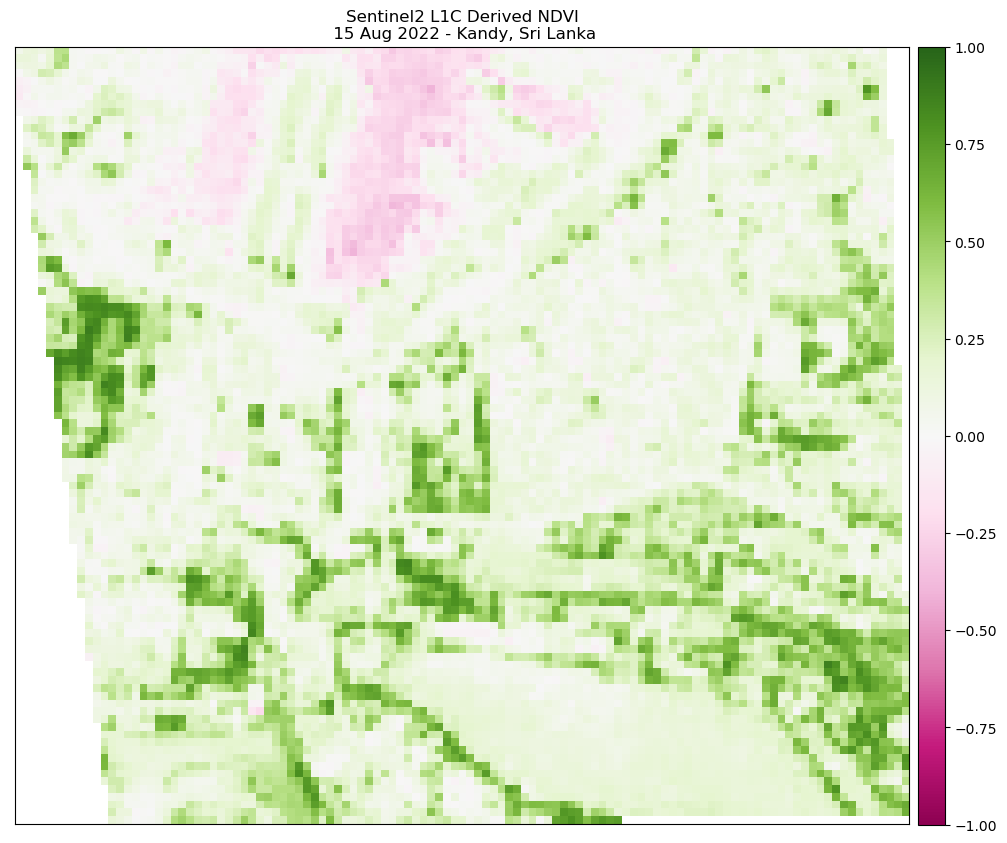

In [102]:
ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L1C Derived NDVI\n 15 Aug 2022 - Kandy, Sri Lanka")
plt.show()

In [103]:
# Forest cover plot
def green_cover_plot_smooth(ndvi,
                     ndvi_data,
                     green_cover,
                     t_count,
                     seq_current,file_name):

    # Apply the nodata mask to the newly classified NDVI data
    ndvi_landsat_class = np.ma.masked_where(np.ma.getmask(ndvi), 
                                            ndvi_data)
    if green_cover == 0.00:
    
        # Define color map
        nbr_colors = ["gray"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = ["No Vegetation"]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        
        ax.set_axis_off()
        plt.savefig('output/gren_cover_no_legend.png',bbox_inches='tight')


        image = Image.open('output/gren_cover_no_legend.png')
        image_smoothed = image.filter(ImageFilter.ModeFilter(size=15))

        image_smoothed = ax.imshow(image_smoothed, cmap=nbr_cmap)
        
        ep.draw_legend(im_ax=image_smoothed, titles=ndvi_cat_names)
        

        
    elif (green_cover > 0.00 and green_cover < 100.00):
            
        # Define color map
        nbr_colors = ["gray", "green"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = [
            "No Vegetation",
            "Vegetation"]


        # Get list of classes
        classes = np.unique(ndvi_landsat_class)
        classes = classes.tolist()

        # The mask returns a value of none in the classes. remove that
        classes = classes[0:2]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        
        ax.set_axis_off()
        plt.savefig('output/gren_cover_no_legend.png',bbox_inches='tight')


        image = Image.open('output/gren_cover_no_legend.png')
        image_smoothed = image.filter(ImageFilter.ModeFilter(size=15))

        image_smoothed = ax.imshow(image_smoothed, cmap=nbr_cmap)
        
        ep.draw_legend(im_ax=image_smoothed, classes=classes, titles=ndvi_cat_names)
        
    else:
            
        # Define color map
        nbr_colors = ["green"]
        nbr_cmap = ListedColormap(nbr_colors)

        # Define class names
        ndvi_cat_names = [
            "Vegetation"]
        
        # Plot your data
        fig, ax = plt.subplots(figsize=(15, 6))
        im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
        
        ax.set_axis_off()
        plt.savefig('output/gren_cover_no_legend.png',bbox_inches='tight')


        image = Image.open('output/gren_cover_no_legend.png')
        image_smoothed = image.filter(ImageFilter.ModeFilter(size=15))

        image_smoothed = ax.imshow(image_smoothed, cmap=nbr_cmap)
        
        ep.draw_legend(im_ax=image_smoothed, titles=ndvi_cat_names)

    # Plot your data
    #fig, ax = plt.subplots(figsize=(15, 6))
    #im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

    #ax.set_axis_off()
    #plt.savefig('output/gren_cover_no_legend.png',bbox_inches='tight')


    #image = Image.open('output/gren_cover_no_legend.png')
    #image_smoothed = image.filter(ImageFilter.ModeFilter(size=15))

    #image_smoothed = ax.imshow(image_smoothed, cmap=nbr_cmap)

    # text box
    textstr = '\n'.join((
        r'Forest cover: %.2f %%' % (green_cover, ),
        r'Total Sequestered Carbon amount: %.2f kg' % (seq_current, ),
        r'No of trees: %.0f' % (t_count, )))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.50, 0.00, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    #ep.draw_legend(im_ax=image_smoothed, classes=classes, titles=ndvi_cat_names)
    ax.set_title(
    "Greenery Details of Your Land- Smoothed ",
    fontsize=14)
    
    #plt.savefig('output/green_cover-'+file_name+'-'+str(green_cover).replace(".", "_" )+'-'+str(t_count)+'-smoothed.png',bbox_inches='tight')
    # plt.show()

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\envs\\spe\\lib\\site-packages\\matplotlib\\pyplot.py'>

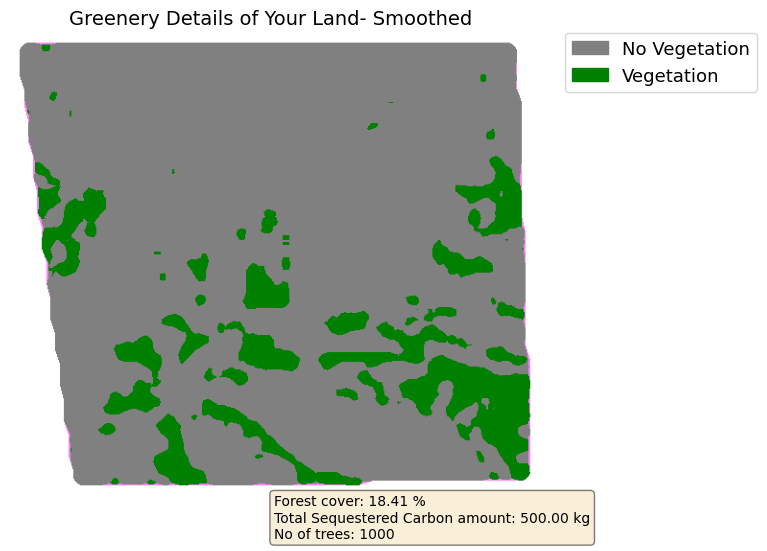

In [104]:
green_cover_plot_smooth(ndvi,
                     ndvi_d,
                     forest_cover,
                     1000,
                     500,kml_file_name_no_ext)